# Gaming Market Analysis for 2017

## Project Description:

The Entertainment Software Rating Board's (ESRB) has collected ratings starting back from 2016, and preparing a campaign for 2017. Analysis involves examining the relationship between ESRB ratings and game sales, as well as other variables such as genre and platform. A variety of statistical techniques will be used to uncover insights, such as regression analysis to identify the most important factors influencing game sales, clustering analysis to group games by similar characteristics, and classification analysis to predict which games are likely to be big winners. This will also highlight predictions based on whether or not a game will be successful. 

- What are the key determinants of a game's success in the global market?
- Can we predict which games are likely to achieve significant sales figures in 2017?
- How do ESRB ratings impact a game's performance and target audience?

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Load Data

In [2]:
games = pd.read_csv('games.csv')

In [3]:
display(games.head())
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Data Preprocessing

In [4]:
games.columns = map(str.lower, games.columns)
print(games.columns)
games['year_of_release'] = games['year_of_release'].fillna(
    0).astype(int).astype(str)

games['rating'] = games['rating'].fillna('Unknown')
games['genre'] = games['genre'].fillna('Unknown')

display(games.head(10))


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown


Columns were changhed to lowercase and types were converted to the correct formats.

### Search for duplicates

In [5]:
display(games[(games.duplicated())])
duplicate_games = games[games['name'].duplicated()]
duplicate_games = duplicate_games.groupby(['name','platform']).count().sort_values(by='genre',ascending=False)
display(duplicate_games.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


year_of_release  genre  na_sales  \
name                        platform                                     
Need for Speed: Most Wanted PC                      2      2         2   
                            X360                    2      2         2   
Madden NFL 13               PS3                     2      2         2   
Sonic the Hedgehog          PS3                     2      2         2   
Rhythm Heaven               Wii                     1      1         1   
Ride 2                      PC                      1      1         1   
Ride                        XOne                    1      1         1   
                            X360                    1      1         1   
                            PS3                     1      1         1   
                            PC                      1      1         1   

                                      eu_sales  jp_sales  other_sales  \
name                        platform                                    
Need for Speed: Most Wanted PC               2         2            2   
                            X360             2         2            2   
Madden NFL 13               PS3              2         2            2   
Sonic the Hedgehog          PS3              2         2            2   
Rhythm Heaven               Wii              1         1            1   
Ride 2                      PC               1         1            1   
Ride                        XOne             1         1            1   
                            X360             1         1            1   
                            PS3              1         1            1   
                            PC               1         1            1   

                                      critic_score  user_score  rating  
name                        platform                                    
Need for Speed: Most Wanted PC                   2           2       2  
                            X360                 2           2       2  
Madden NFL 13               PS3                  2           2       2  
Sonic the Hedgehog          PS3                  2           2       2  
Rhythm Heaven               Wii                  0           0       1  
Ride 2                      PC                   1           1       1  
Ride                        XOne                 1           1       1  
                            X360                 0           0       1  
                            PS3                  0           1       1  
                            PC                   1           1       1

In [6]:
display(games[games['name']=='Need for Speed: Most Wanted'])
display(games[games['name']=='Madden NFL 13'])
display(games[games['name']=='Sonic the Hedgehog'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,Unknown
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,Unknown
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,Unknown
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,NaN,NaN,Unknown
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,Sonic the Hedgehog,PS3,0,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


In [7]:
games.loc[games['name'] == 'Sonic the Hedgehog', 'year_of_release'] = 2006
display(games[games['name']=='Sonic the Hedgehog'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,2006,Platform,3.03,0.91,0.26,0.13,NaN,NaN,Unknown
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,Sonic the Hedgehog,PS3,2006,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


Duplicates were found for Sonic the Hedgehog, Madden NFL 13, and Need for Speed: Most Wanted. The duplicates were not removed and the year of release was updated for Sonic the Hedgehog. The duplicates were not removed because they were the same game, but for different platforms. The year of release was updated for Sonic the Hedgehog because the year of release was incorrect.

In [8]:
games['critic_score'] = np.where(np.isnan(games['critic_score']), -1, games['critic_score'])
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['year_of_release'] = games['year_of_release'].astype('int64')
games['critic_score'] = games['critic_score'].astype('int64')
games['user_score'] = games['user_score'].astype('float64')
display(games['user_score'].sort_values().unique())
display(games['critic_score'].sort_values().unique())
display(games['year_of_release'].sort_values().unique())

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

array([-1, 13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

array([   0, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016])

All column names are changed to lowercase and the year_of_release is converted to an integer value. There are NaN values in critic_score, user_score, and rating, these will be kept and not changed to -1 valeus and ignored later. It is likely there was no review given and making them zero values would skew the data. Values as TBD will also be changed, as they may be updated later, as they have not been releases. 

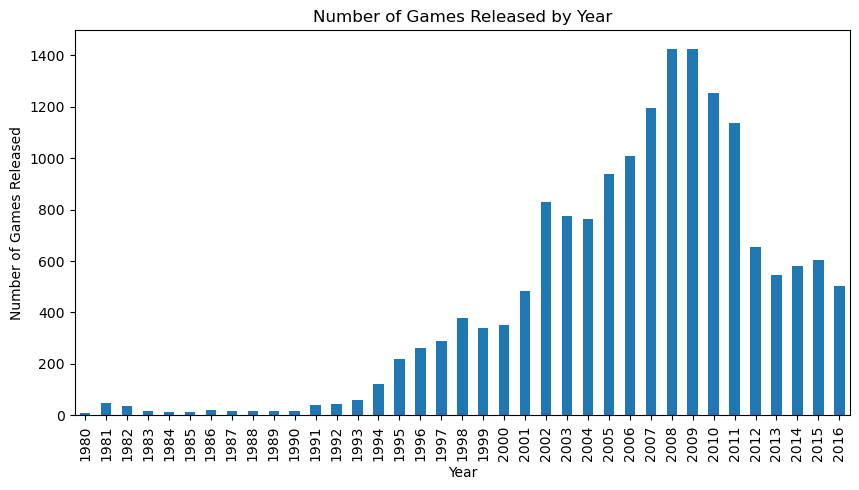

In [9]:
filtered_games = games[(games['year_of_release'] != 0)
                       & (games['year_of_release'] != -1)]

games_by_year = filtered_games.groupby('year_of_release')['name'].count()

games_by_year.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released by Year')
plt.xticks(rotation= 90)
plt.show()


The number of games released by year has been increasing since 1994. The number of games released peaked in 2008 and 2009, and has been decreasing since then. This could be due to the rise of mobile gaming and the increase in the number of games released on mobile platforms.

In [10]:
games['global_sales'] = games['na_sales'] + \
    games['eu_sales'] + games['jp_sales'] + games['other_sales']

games['total_sales'] = games.groupby('platform')['global_sales'].sum(
).sort_values(ascending=False).reset_index()['global_sales']
print(games[['name', 'platform', 'global_sales', 'total_sales']].head(10))

games['total_sales'] = games.groupby(
    'platform')['global_sales'].transform('sum')
games.sort_values(by='total_sales', ascending=False).head(10)


                        name platform  global_sales  total_sales
0                 Wii Sports      Wii         82.54      1255.77
1          Super Mario Bros.      NES         40.24       971.42
2             Mario Kart Wii      Wii         35.52       939.65
3          Wii Sports Resort      Wii         32.77       907.51
4   Pokemon Red/Pokemon Blue       GB         31.38       806.12
5                     Tetris       GB         30.26       730.86
6      New Super Mario Bros.       DS         29.80       317.85
7                   Wii Play      Wii         28.91       314.14
8  New Super Mario Bros. Wii      Wii         28.32       294.05
9                  Duck Hunt      NES         28.31       259.52


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales,total_sales
15090,Memories Off: Sorekara Again,PS2,2006,Adventure,0.00,0.00,0.02,0.00,-1,NaN,Unknown,0.02,1255.77
7553,ESPN MLB Baseball,PS2,2004,Sports,0.10,0.08,0.00,0.03,-1,NaN,Unknown,0.21,1255.77
3163,Jampack Volume 13 (RP-T),PS2,2005,Misc,0.31,0.24,0.00,0.08,-1,NaN,Unknown,0.63,1255.77
5362,Monster Rancher 4,PS2,2003,Simulation,0.08,0.06,0.19,0.02,77,9.1,E,0.35,1255.77
5364,Tim Burton's The Nightmare Before Christmas: O...,PS2,2004,Adventure,0.17,0.13,0.00,0.04,65,8.6,E10+,0.34,1255.77
5367,MotorStorm: Arctic Edge,PS2,2009,Racing,0.07,0.03,0.00,0.25,72,8.3,T,0.35,1255.77
12773,Pump It Up: Exceed,PS2,2005,Misc,0.03,0.02,0.00,0.01,73,8.4,T,0.06,1255.77
5370,Super Bust-A-Move,PS2,2000,Puzzle,0.17,0.13,0.00,0.04,75,NaN,E,0.34,1255.77
7573,Dead to Rights II,PS2,2005,Shooter,0.10,0.08,0.00,0.03,51,5.3,M,0.21,1255.77
7568,Taiko no Tatsujin: Waku Waku Anime Matsuri,PS2,2003,Misc,0.00,0.00,0.20,0.00,-1,NaN,Unknown,0.20,1255.77


## Top Platforms

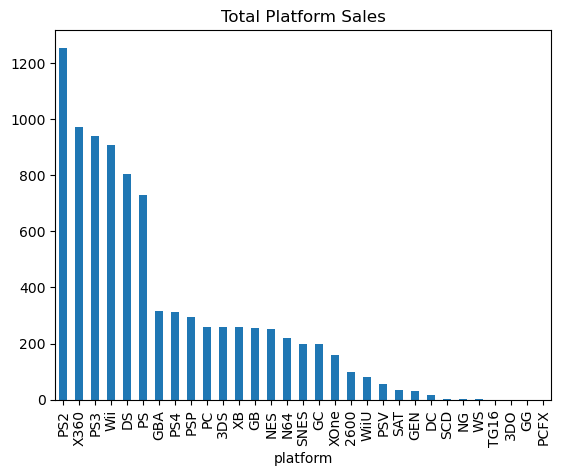

In [11]:
games.groupby('platform')['global_sales'].sum().sort_values(
    ascending=False).plot(kind='bar', title='Total Platform Sales')
plt.show()


In total platform sales, the platform with the most sales are PS2, followed by the X360, PS3, Wii, and DS, so we can say these are the top 5 platforms are PS2, X360, PS3, Wii, and DS. The bottom 5 platforms are GEN, DC, SCD, NG, and WS.

In [12]:
relevant_games = games.copy()
display(relevant_games.groupby('platform')[
        'total_sales'].sum().sort_values(ascending=False))


platform
PS2     2713718.97
DS      1733964.12
PS3     1250674.15
X360    1225932.04
Wii     1197913.20
PS       874839.42
PSP      355506.45
GBA      261272.70
PC       252772.48
XB       212377.76
3DS      134680.00
PS4      123142.88
GC       110605.08
N64       69758.92
SNES      47809.56
XOne      39352.04
GB        25035.08
NES       24602.90
PSV       23250.10
2600      12898.34
WiiU      12081.93
SAT        5811.07
GEN         892.33
DC          829.40
NG           17.28
SCD          11.16
WS            8.52
TG16          0.32
3DO           0.30
GG            0.04
PCFX          0.03
Name: total_sales, dtype: float64

Percentage of total sales top 10 platforms: 76.23498296826614
Percentage of total sales top 3 platforms: 35.51977352336494


['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

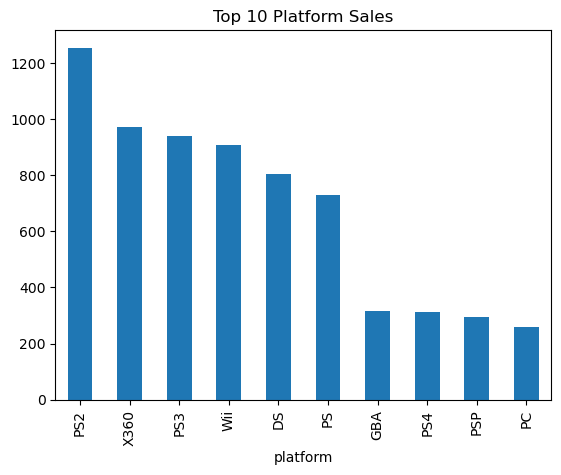

In [14]:
relevant_games.groupby('platform')['global_sales'].sum().sort_values(ascending=False)[0:10].plot(
    kind='bar', title='Top 10 Platform Sales')
total_sales = games['global_sales'].sum()
top_10_platforms = ['PS2', 'X360', 'PS3', 'Wii',
                    'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']
top_10_sales = games[games['platform'].isin(
    top_10_platforms)]['global_sales'].sum()
top_10_percentage = (top_10_sales / total_sales) * 100
top_3_platforms = ['PS2', 'X360', 'PS3']
top_3_sales = games[games['platform'].isin(
    top_3_platforms)]['global_sales'].sum()
top_3_percentage = (top_3_sales / total_sales) * 100
total_sales = games['global_sales'].sum()

top_10_platforms = ['PS2', 'X360', 'PS3', 'Wii',
                    'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']
top_10_sales = games[games['platform'].isin(
    top_10_platforms)]['global_sales'].sum()
top_10_percentage = (top_10_sales / total_sales) * 100

top_3_platforms = ['PS2', 'X360', 'PS3']
top_3_sales = games[games['platform'].isin(
    top_3_platforms)]['global_sales'].sum()
top_3_percentage = (top_3_sales / total_sales) * 100

print("Percentage of total sales top 10 platforms:",
      top_10_percentage)
print("Percentage of total sales top 3 platforms:", top_3_percentage)

list(relevant_games.groupby('platform')[
     'global_sales'].sum().sort_values(ascending=False).head(10).index)


The top 10 platforms are PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP, and PC. The top 3 are PS2, X360, and PS3. The top 10 platforms account for 76.2% of the total sales. The top 3 platforms account for 35.5% of the total sales. The top 10 platforms are the most popular platforms.

From the plot, we can see that there is a general upward trend in the number of platforms released each year, with a peak in the mid-2000s. It appears that new platforms tend to appear every few years, while old ones take several years to fade out of popularity. However, the exact time frame may vary depending on various factors such as market demand and technological advancements.

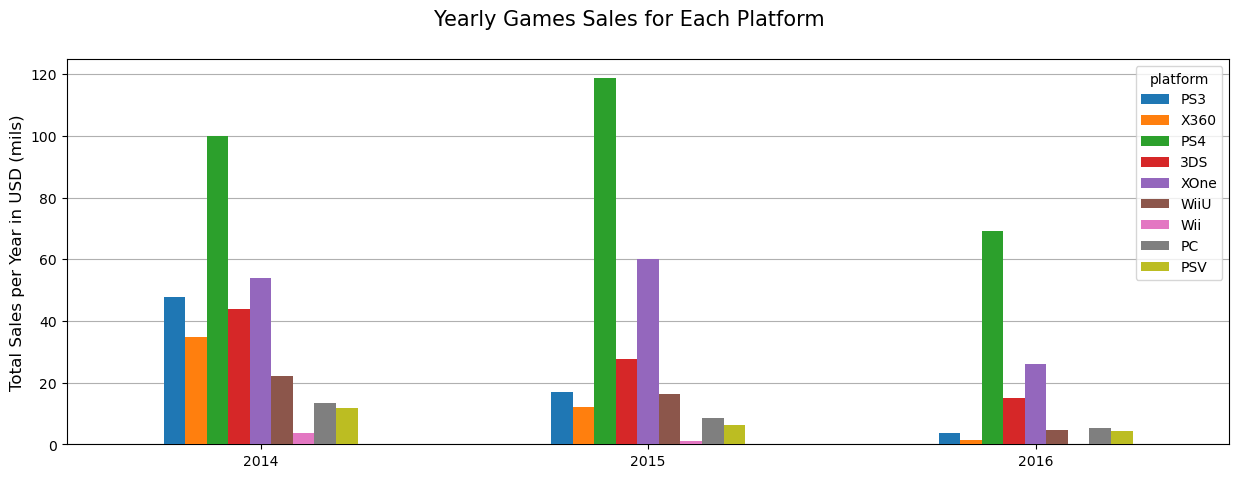

In [15]:
games_pivot = pd.pivot_table(games[games['year_of_release'] >= 2014],
                             index='year_of_release',
                             columns='platform',
                             values='global_sales',
                             aggfunc='sum')
games_pivot = games_pivot[['PS3', 'X360', 'PS4',
                           '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV']]
games_pivot.plot(kind='bar', figsize=(15, 5), zorder=3)
plt.suptitle("Yearly Games Sales for Each Platform", fontsize=15)
plt.xticks(rotation=0)
plt.grid(axis='y', zorder=0)
plt.ylabel('Total Sales per Year in USD (mils)', fontsize=12)
plt.xlabel('')
plt.show()


It would be relevant to look at data from 2014 to 2016 in order to build a prediction for 2017. We can use this data to identify trends in platform usage and user preferences that can help us predict the future of the platforms and games.

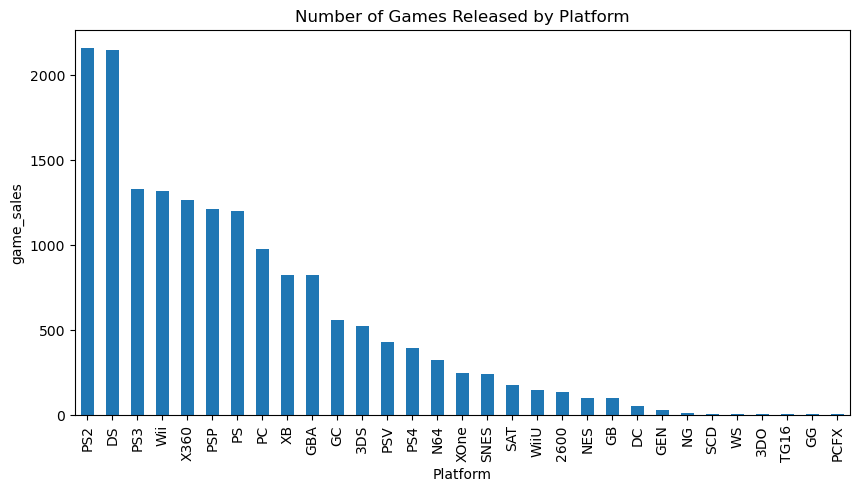

In [16]:
platform_counts = games['platform'].value_counts()

platform_counts.plot(kind='bar', x='platform', y='name', figsize=(10, 5)), plt.xlabel('Platform'), plt.ylabel('game_sales'), plt.title('Number of Games Released by Platform')
plt.show()


In [17]:
games_per_year = games.groupby('year_of_release')['name'].count()
print(games_per_year)


year_of_release
0        268
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1008
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


In [18]:
games['platform'].unique()


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### Top Platform Sales

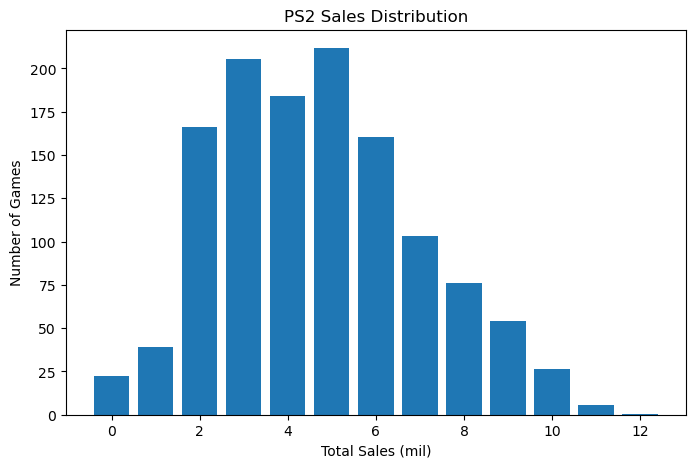

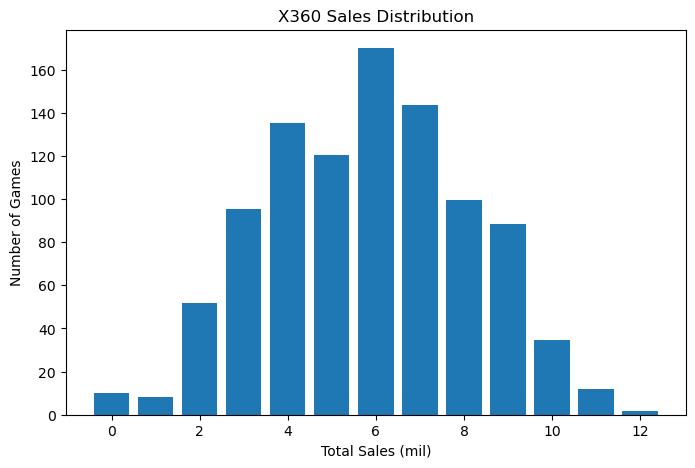

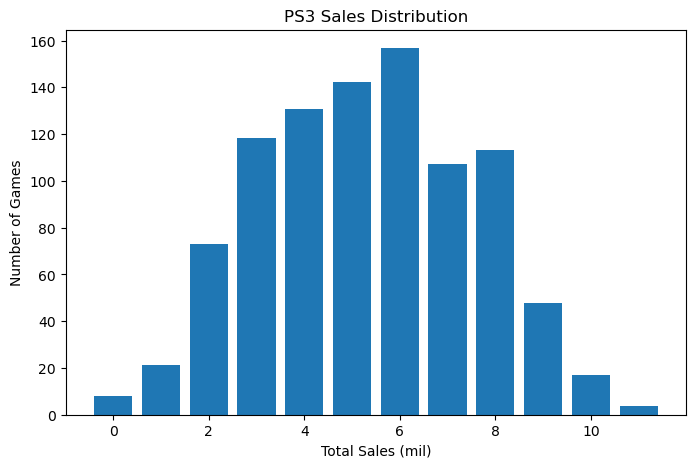

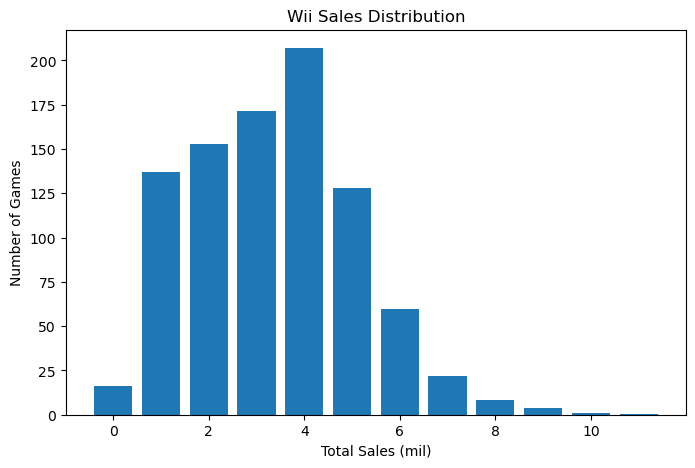

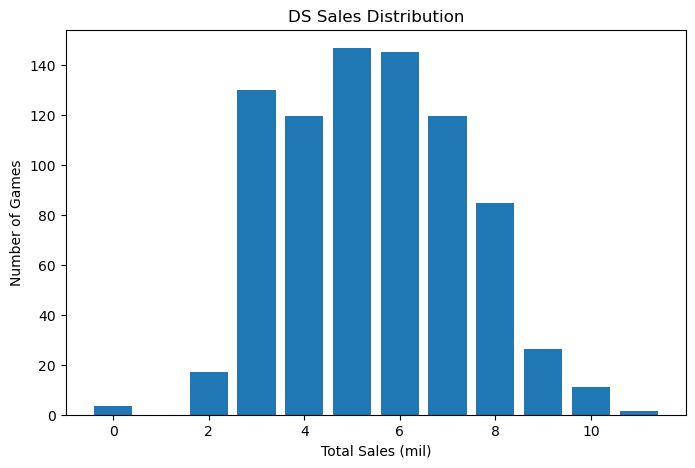

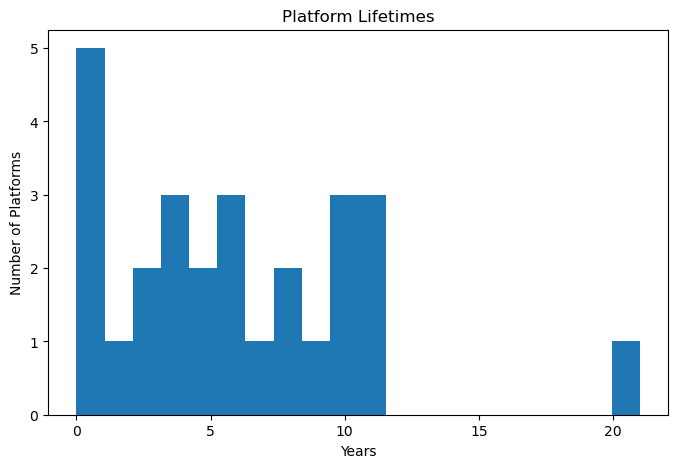

In [19]:
import numpy as np

platform_sales = games.groupby(['year_of_release', 'platform'])['global_sales'].sum().reset_index()

top_platforms = platform_sales.groupby('platform')['global_sales'].sum().sort_values(ascending=False).head(5).index

for platform in top_platforms:
    plt.figure(figsize=(8, 5))
    platform_data = platform_sales[platform_sales['platform'] == platform]['global_sales']
    platform_data = np.nan_to_num(platform_data) 
    plt.bar(range(len(platform_data)), platform_data, width=0.8)
    plt.title(f"{platform} Sales Distribution")
    plt.xlabel("Total Sales (mil)")
    plt.ylabel("Number of Games")
    plt.show()

zero_sales_platforms = platform_sales[platform_sales['global_sales'] == 0]['platform'].unique()

platform_lifetimes = games[(games['year_of_release'] >= 1995) & (games['year_of_release'] <= 2016)].groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifetimes['lifetime'] = platform_lifetimes['max'] - platform_lifetimes['min']

plt.figure(figsize=(8, 5))
platform_lifetimes['lifetime'].dropna().plot(kind='hist', bins=20)
plt.title('Platform Lifetimes')
plt.xlabel('Years')
plt.ylabel('Number of Platforms')
plt.show()



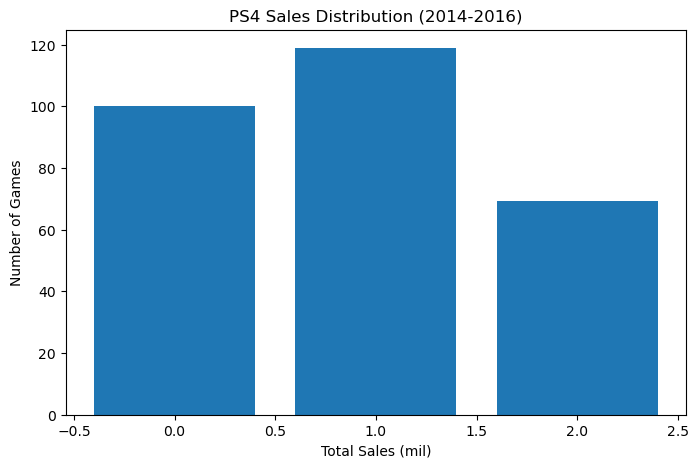

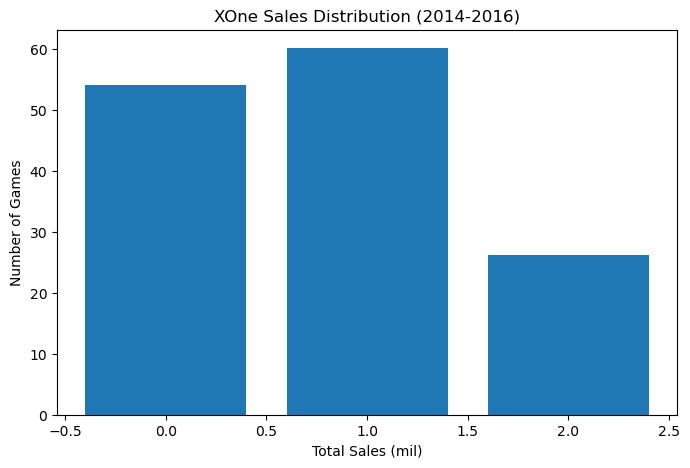

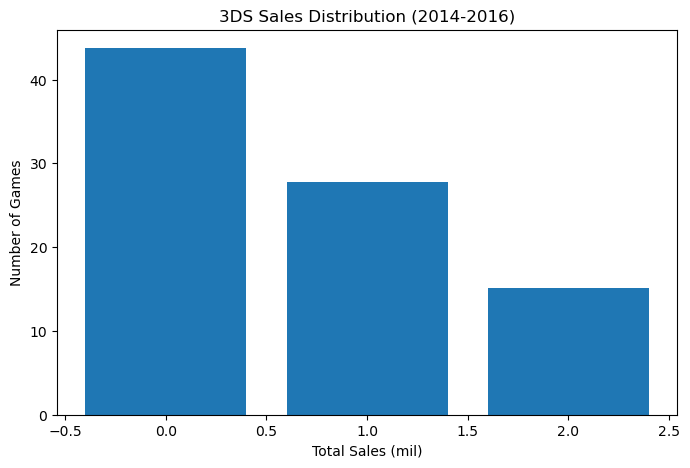

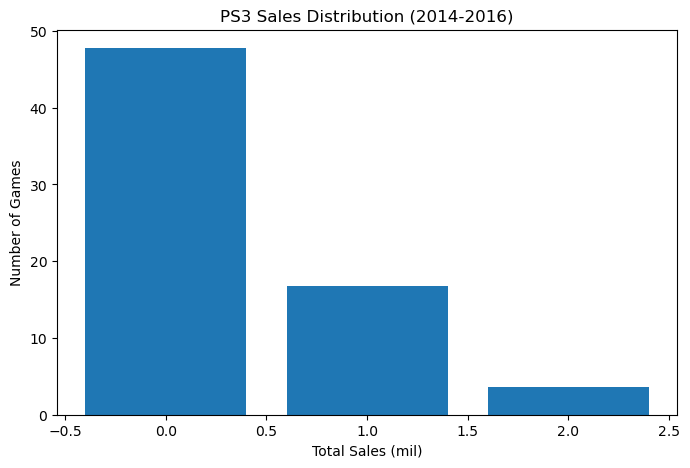

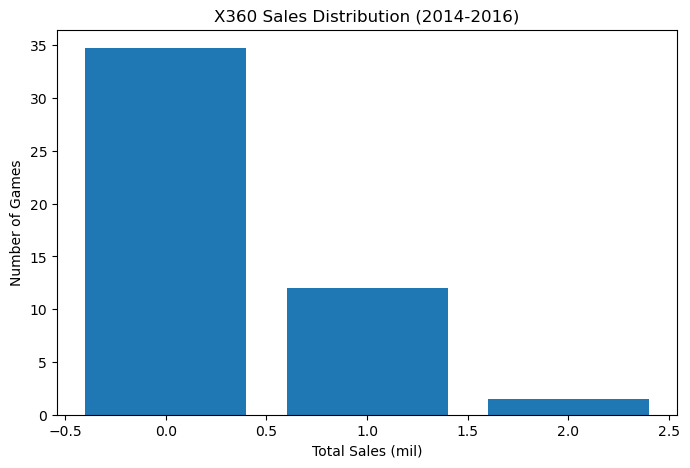

In [20]:
platform_sales = games[(games['year_of_release'] >= 2014) & (games['year_of_release'] <= 2016)].groupby(['year_of_release', 'platform'])['global_sales'].sum().reset_index()

top_platforms = platform_sales.groupby('platform')['global_sales'].sum().sort_values(ascending=False).head(5).index

for platform in top_platforms:
    plt.figure(figsize=(8, 5))
    platform_data = platform_sales[platform_sales['platform'] == platform]['global_sales']
    platform_data = np.nan_to_num(platform_data) 
    plt.bar(range(len(platform_data)), platform_data, width=0.8)
    plt.title(f"{platform} Sales Distribution (2014-2016)")
    plt.xlabel("Total Sales (mil)")
    plt.ylabel("Number of Games")
    plt.show()



These top 5 platforms show the promising platforms for future games. These were chosen by platforms with the most sales. They tell us the sales distrubtion for each platform by number of games. Looking at the sales distribution for the selected time period, the most promising platforms are PS4 and XOne. These are the only platforms that have increasing sales with the number of games over the last 3 years. The other platforms are decreasing in sales and are not promising for future games.

(0.0, 3.0)

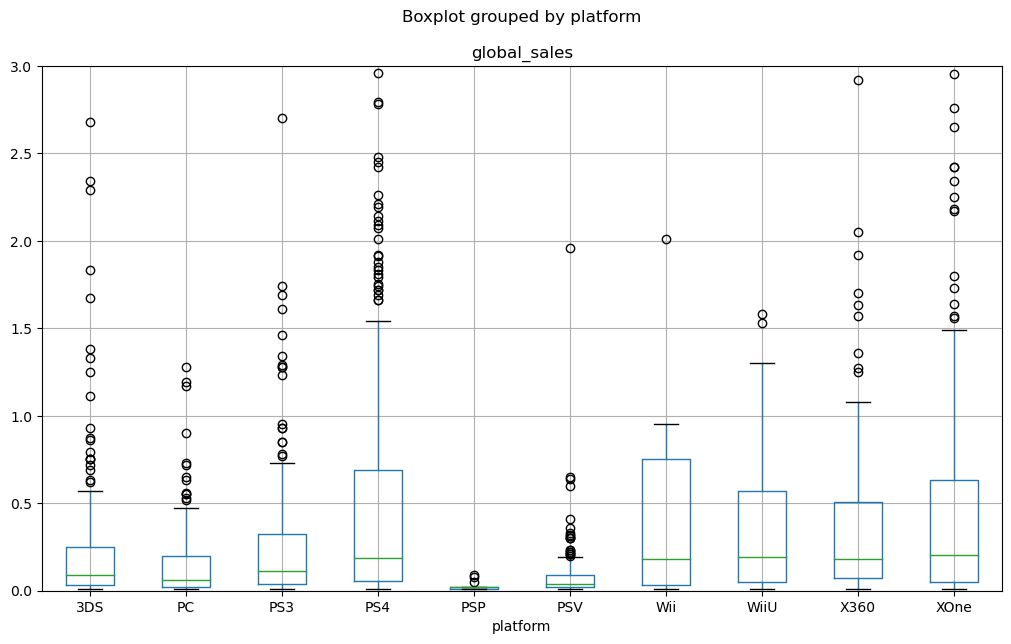

In [22]:
games[games['year_of_release'] >= 2014].boxplot(
    'global_sales', by='platform', figsize=(12, 7))
plt.ylim(0, 3)


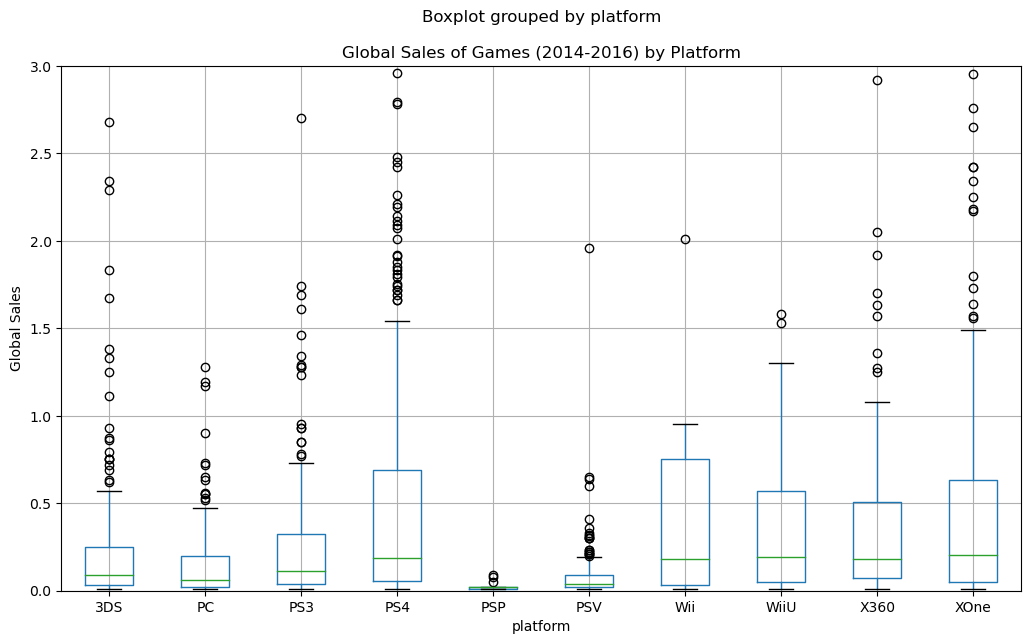

In [23]:
games[games['year_of_release'] >= 2014].boxplot(
    'global_sales', by='platform', figsize=(12, 7))
plt.ylim(0, 3)
plt.title("Global Sales of Games (2014-2016) by Platform")
plt.ylabel("Global Sales")

plt.show()


The above boxplot shows the Global Sales Distribution by Platforms for the time range of 2014-2016. We can see that there are many outliers for mopst platforms, this is due to certian popular games that were sold in high volumes, so it is very common. The platforms with the highest median sales are PS4, Wii, WiiU, X360, and XOne. The PS4 and XOne have a large box, representing the interquartile range (IQR) that the data is more spread out and has a higher variance. Also they have long whiskers, indicating their long range of sales. Looking at 3DS, we see a small box, lower median, and lots of outliers, meaning that a large part of their sales are from outliers.


### Analysis of Sales Depending on Critics' and Users' Scores

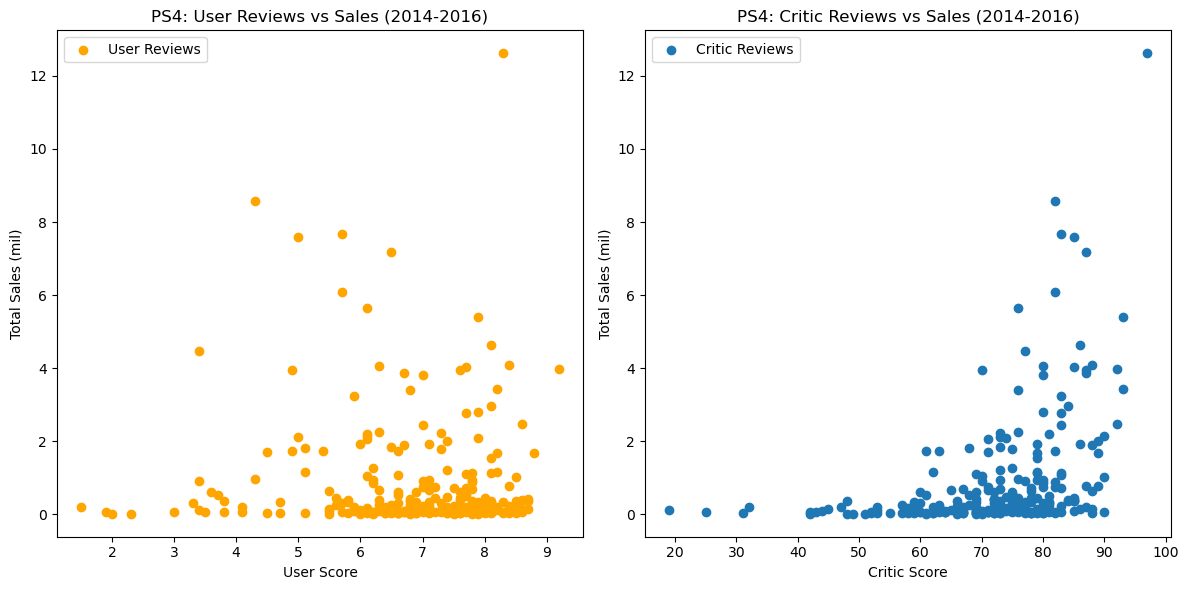

PS4: Correlation coefficients
User Reviews vs Total Sales: -0.040131589472697356
Critic Reviews vs Total Sales: 0.40266141068104083


In [24]:
ps4_user_data = games[(games['platform'] == 'PS4') & (games['year_of_release'] >= 2014) & (
    games['year_of_release'] <= 2016) & (games['user_score'] != -1)]
ps4_critic_data = games[(games['platform'] == 'PS4') & (games['year_of_release'] >= 2014) & (
    games['year_of_release'] <= 2016) & (games['critic_score'] != -1)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ps4_user_data['user_score'],
            ps4_user_data['global_sales'], color='orange', label='User Reviews')
ax1.set_xlabel('User Score')
ax1.set_ylabel('Total Sales (mil)')
ax1.set_title('PS4: User Reviews vs Sales (2014-2016)')
ax1.legend()

ax2.scatter(ps4_critic_data['critic_score'],
            ps4_critic_data['global_sales'], label='Critic Reviews')
ax2.set_xlabel('Critic Score')
ax2.set_ylabel('Total Sales (mil)')
ax2.set_title('PS4: Critic Reviews vs Sales (2014-2016)')
ax2.legend()

plt.tight_layout()
plt.show()

print("PS4: Correlation coefficients")
print("User Reviews vs Total Sales:",
      ps4_user_data['user_score'].corr(ps4_user_data['global_sales']))
print("Critic Reviews vs Total Sales:",
      ps4_critic_data['critic_score'].corr(ps4_critic_data['global_sales']))


For the PS4 platform, there is a weak correlation between user reviews and total sales, and a moderate correlation between critic reviews and total sales. This is interesting because it shows that critic reviews are more important than user reviews for the PS4 platform. This could be because the PS4 is a newer platform, and users are still getting used to it. It could also be because the PS4 is a more expensive platform, and users are more likely to read critic reviews before purchasing it.

The above shows the correlation coefficients of PS4, which is the most popular platform in the current market. The correlation coefficient for critic reviews is much higher than that of user reviews, which means that critic reviews have a stronger correlation with total sales than user reviews.

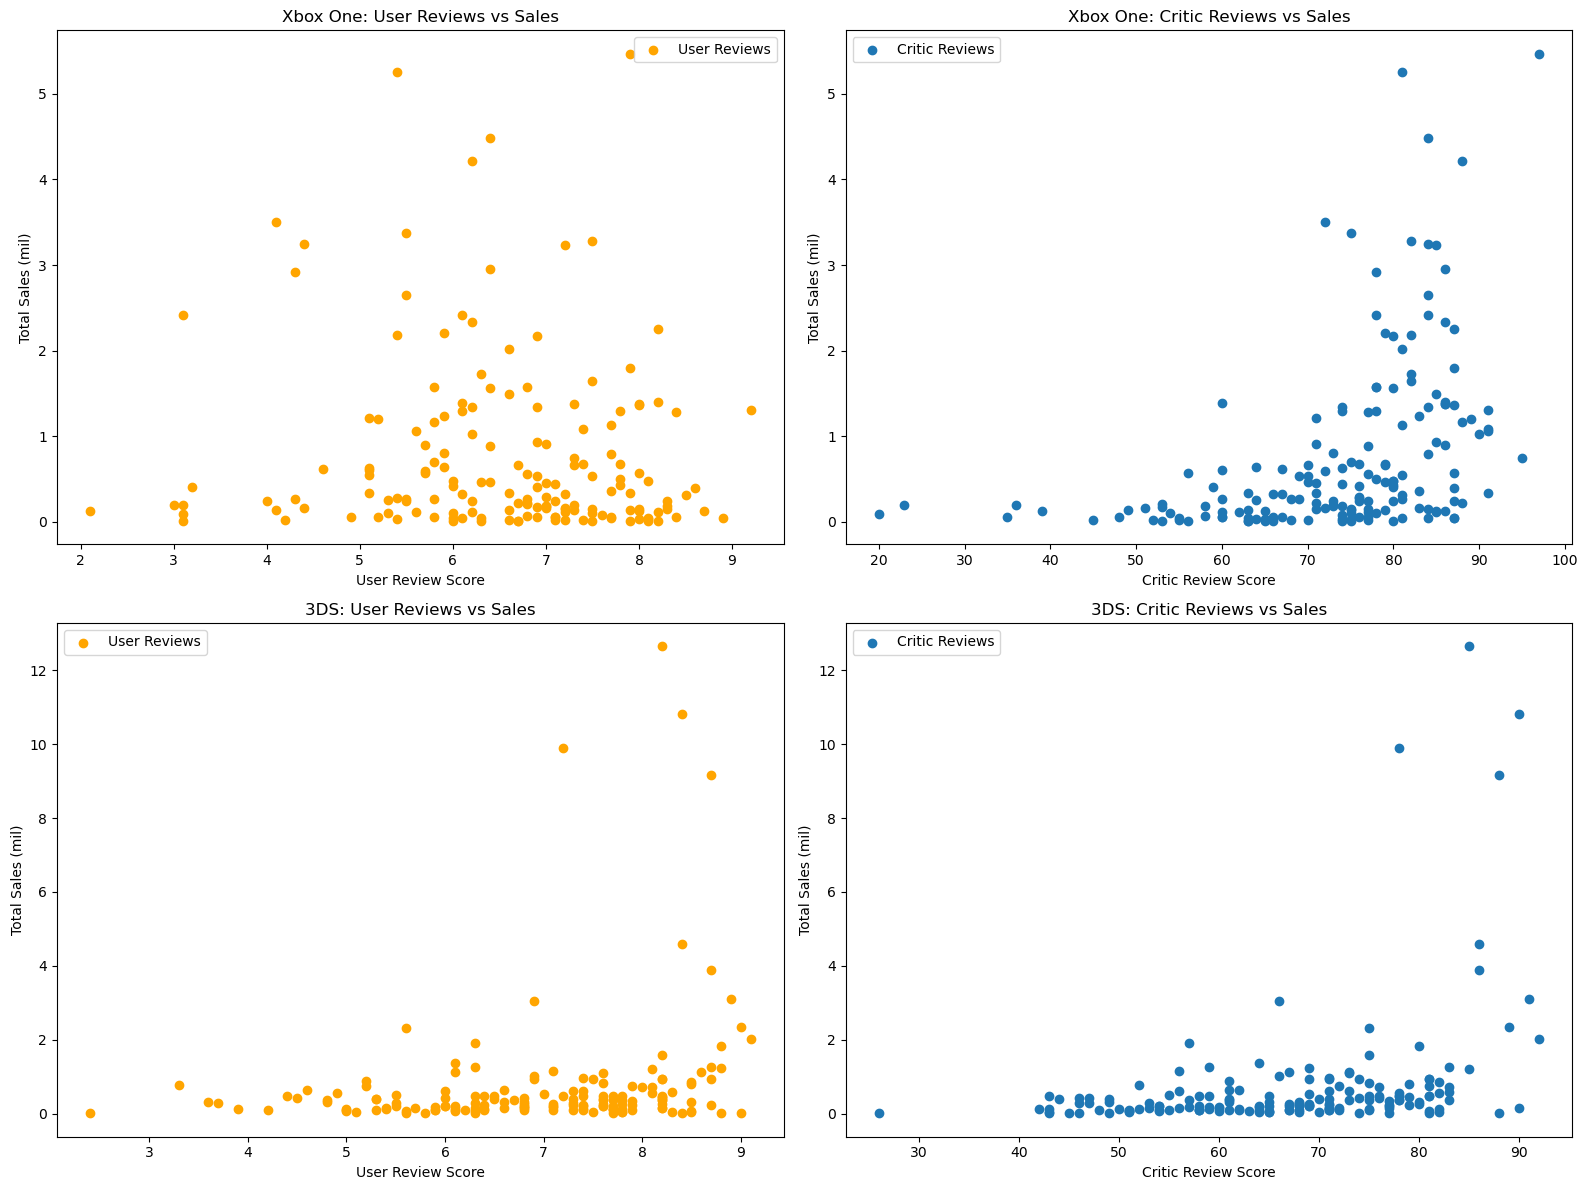

Xbox One: Correlation coefficients
User Reviews vs Total Sales: 7.45257976675127e-17
Critic Reviews vs Total Sales: -2.6043312896249768e-17
3DS: Correlation coefficients
User Reviews vs Total Sales: nan
Critic Reviews vs Total Sales: nan


In [25]:
xbox_data = games[(games['platform'] == 'XOne') & (games['user_score'] != -1) & (games['critic_score'] != -1)]
ds3_data = games[(games['platform'] == '3DS') & (games['user_score'] != -1) & (games['critic_score'] != -1)]

xone_user_corr = xbox_data['user_score'].corr(xbox_data['total_sales'])
xone_critic_corr = xbox_data['critic_score'].corr(xbox_data['total_sales'])

ds3_user_corr = ds3_data['user_score'].corr(ds3_data['total_sales'])
ds3_critic_corr = ds3_data['critic_score'].corr(ds3_data['total_sales'])

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

axs[0, 0].scatter(xbox_data['user_score'], xbox_data['global_sales'], label='User Reviews', color='orange')
axs[0, 0].set_xlabel('User Review Score')
axs[0, 0].set_ylabel('Total Sales (mil)')
axs[0, 0].set_title('Xbox One: User Reviews vs Sales')
axs[0, 0].legend()

axs[0, 1].scatter(xbox_data['critic_score'], xbox_data['global_sales'], label='Critic Reviews')
axs[0, 1].set_xlabel('Critic Review Score')
axs[0, 1].set_ylabel('Total Sales (mil)')
axs[0, 1].set_title('Xbox One: Critic Reviews vs Sales')
axs[0, 1].legend()

axs[1, 0].scatter(ds3_data['user_score'], ds3_data['global_sales'], label='User Reviews', color='orange')
axs[1, 0].set_xlabel('User Review Score')
axs[1, 0].set_ylabel('Total Sales (mil)')
axs[1, 0].set_title('3DS: User Reviews vs Sales')
axs[1, 0].legend()

axs[1, 1].scatter(ds3_data['critic_score'], ds3_data['global_sales'], label='Critic Reviews')
axs[1, 1].set_xlabel('Critic Review Score')
axs[1, 1].set_ylabel('Total Sales (mil)')
axs[1, 1].set_title('3DS: Critic Reviews vs Sales')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

print("Xbox One: Correlation coefficients")
print("User Reviews vs Total Sales:", xone_user_corr)
print("Critic Reviews vs Total Sales:", xone_critic_corr)

print("3DS: Correlation coefficients")
print("User Reviews vs Total Sales:", ds3_user_corr)
print("Critic Reviews vs Total Sales:", ds3_critic_corr)


In [26]:
game_sales = games.groupby(['name', 'platform'])[
    'global_sales'].sum().reset_index()

popular_games = ['Minecraft', 'FIFA 16',
                 'Call of Duty: Black Ops III', 'Grand Theft Auto V', 'Destiny']

popular_game_sales = game_sales[game_sales['name'].isin(popular_games)]

popular_game_sales_pivot = popular_game_sales.pivot(
    index='name', columns='platform', values='global_sales')
print(popular_game_sales_pivot)


platform              PC    PS3    PS4   PSV  WiiU   X360  XOne
name                                                           
Destiny              NaN   1.61   5.64   NaN   NaN   1.92  3.37
FIFA 16             0.20   2.70   8.58   NaN   NaN   1.57  3.25
Grand Theft Auto V  1.17  21.05  12.62   NaN   NaN  16.27  5.47
Minecraft            NaN   5.27   4.32  1.96  0.67   9.18  2.76


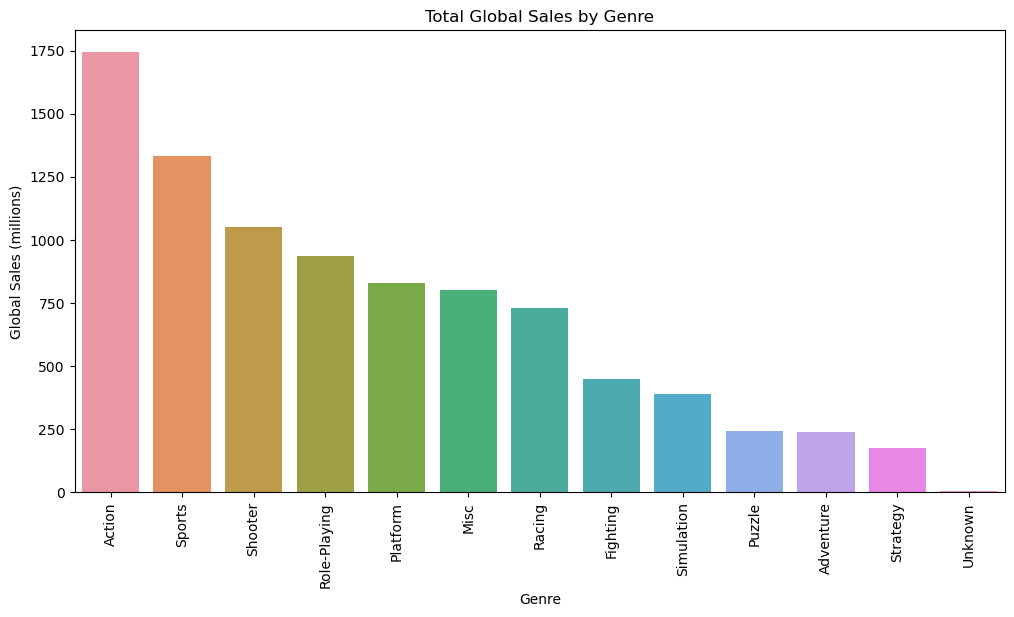

In [27]:
genre_sales = games.groupby('genre')['global_sales'].sum().reset_index()
genre_sales = genre_sales.sort_values('global_sales', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='genre', y='global_sales', data=genre_sales)
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=90)
plt.show()


The above graph shows that the overal most popular genre is Action, followed by Sports and Shooter. The least popular genre is puzzle, followed by Strategy and Adventure.

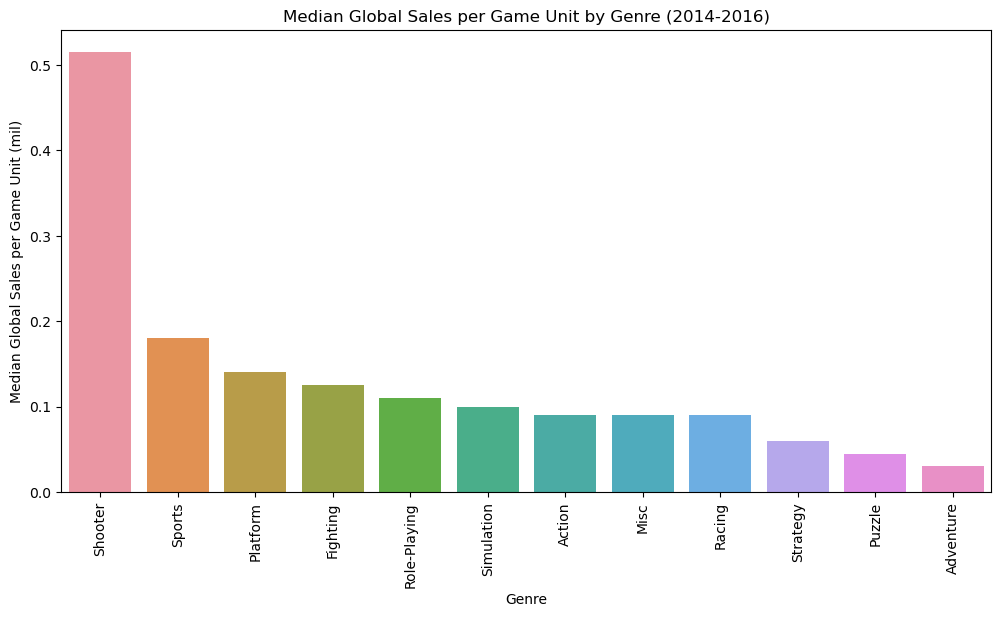

In [28]:
genre_sales = games[(games['year_of_release'] >= 2014) & (games['year_of_release'] <= 2016)].groupby(
    'genre')['global_sales'].agg(['median', 'mean']).reset_index()
genre_sales = genre_sales.sort_values('median', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='median', data=genre_sales)
plt.title('Median Global Sales per Game Unit by Genre (2014-2016)')
plt.xlabel('Genre')
plt.ylabel('Median Global Sales per Game Unit (mil)')
plt.xticks(rotation=90)
plt.show()


The above graph shows, between the time period of 2014-2016, that the median global sales per game unit for the Shooter genre is the highest, followed by Sports and Platform. The lowest median global sales per game unit is for the Adventure genre.

### User Profile for Each Region

In [29]:
relevant_games = games[(games['year_of_release'] > 2014)
                       & (games['year_of_release'] <= 2016)]
na_relevant_games = relevant_games[relevant_games['na_sales'] > 0][[
    'na_sales', 'user_score', 'rating']]
eu_relevant_games = relevant_games[relevant_games['eu_sales'] > 0][[
    'eu_sales', 'user_score', 'rating']]
ja_relevant_games = relevant_games[relevant_games['jp_sales'] > 0][[
    'jp_sales', 'user_score', 'rating']]
na_relevant_games = games[(games['year_of_release'] > 2014) & (
    games['year_of_release'] <= 2016) & (games['na_sales'] > 0)][['na_sales', 'user_score', 'rating', 'platform']]
eu_relevant_games = games[(games['year_of_release'] > 2014) & (
    games['year_of_release'] <= 2016) & (games['eu_sales'] > 0)][['eu_sales', 'user_score', 'rating', 'platform']]
jp_relevant_games = games[(games['year_of_release'] > 2014) & (
    games['year_of_release'] <= 2016) & (games['jp_sales'] > 0)][['jp_sales', 'user_score', 'rating', 'platform']]

na_top_platforms = na_relevant_games.groupby(
    'platform')['na_sales'].sum().sort_values(ascending=False).head(5)
print('Top 5 platforms in NA region')
print(na_top_platforms)

eu_top_platforms = eu_relevant_games.groupby(
    'platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
print('Top 5 platforms in EU region')
print(eu_top_platforms)

jp_top_platforms = jp_relevant_games.groupby(
    'platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
print('Top 5 platforms in JP region')
print(jp_top_platforms)


Top 5 platforms in NA region
platform
PS4     63.86
XOne    50.30
3DS     10.31
WiiU     8.86
X360     8.05
Name: na_sales, dtype: float64
Top 5 platforms in EU region
platform
PS4     83.54
XOne    28.10
PC       9.10
3DS      7.39
PS3      7.30
Name: eu_sales, dtype: float64
Top 5 platforms in JP region
platform
3DS     23.55
PS4     12.05
PSV      8.41
PS3      4.97
WiiU     4.12
Name: jp_sales, dtype: float64


For the period of 2014-2016, the top 5 platforms differ per region, with the exception of PS4 being in the first and seconnd position for each region. XOne is also the 2nd top platform for both NA and EU. JP also has more variety in the top 5.

In [30]:
relevant_games = games[(games['year_of_release'] > 2014)
                       & (games['year_of_release'] <= 2016)]
na_relevant_games = relevant_games[relevant_games['na_sales'] > 0]
eu_relevant_games = relevant_games[relevant_games['eu_sales'] > 0]
ja_relevant_games = relevant_games[relevant_games['jp_sales'] > 0]

na_top_genres = na_relevant_games.groupby(
    'genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_top_genres = eu_relevant_games.groupby(
    'genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
ja_top_genres = ja_relevant_games.groupby(
    'genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print('Top genres in NA:')
print(na_top_genres)
print()
print('Top genres in EU:')
print(eu_top_genres)
print()
print('Top genres in JP:')
print(ja_top_genres)


Top genres in NA:
genre
Shooter         48.18
Action          33.68
Sports          26.31
Role-Playing    19.82
Misc             5.58
Name: na_sales, dtype: float64

Top genres in EU:
genre
Shooter         40.28
Action          34.82
Sports          27.82
Role-Playing    17.21
Racing           6.52
Name: eu_sales, dtype: float64

Top genres in JP:
genre
Action          23.05
Role-Playing    13.41
Shooter          3.79
Misc             3.19
Adventure        2.22
Name: jp_sales, dtype: float64


ESRB ratings do affect sales in individual regions with ratings for video games based on their content. In the provided dataset, the impact of ESRB ratings on sales in individual regions can be explored by analyzing the sales data grouped by ESRB rating for each region. This information can provide insights into the types of games that are popular in each region and how the ESRB ratings may influence sales. In conclusion, NA, and EU favor Shooter, Action, and Sports games, while JP favors Action, Role-playing, and Shooter, respectively. This could be based on cultural preferances or tolerance for Mature content.

## Sales vs User Score and Critic Score

<Axes: title={'center': 'Sales vs Critics'}, xlabel='Critic Score', ylabel='Total Sales (USD)'>

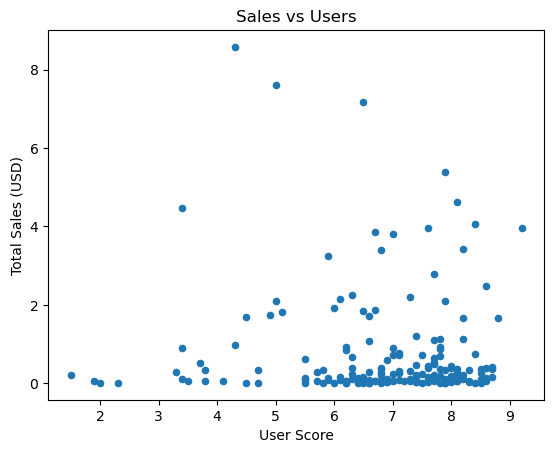

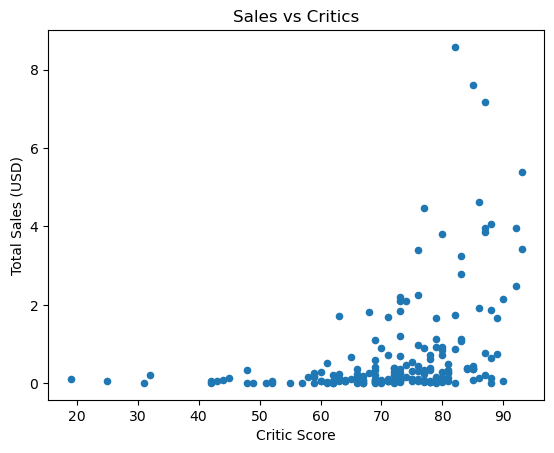

In [31]:
ps4_games = relevant_games[(relevant_games['platform'] == 'PS4') & (
    relevant_games['user_score'] != -1) & (relevant_games['critic_score'] != -1)]

ps4_games.plot(
    kind='scatter',
    title='Sales vs Users',
    x='user_score',
    y='global_sales',
    xlabel='User Score',
    ylabel='Total Sales (USD)'
)

ps4_games.plot(
    kind='scatter',
    title='Sales vs Critics',
    x='critic_score',
    y='global_sales',
    xlabel='Critic Score',
    ylabel='Total Sales (USD)'
)


Looking at the PS4, which is among the top 5 and most popular consoles, we can see that there is a positive correlation between user score and total sales. This is also true for critic score and total sales.  There is a stronger correlation between critic score and total sales than user score and total sales. This is likely due to the fact that critics are more likely to be objective in their reviews than users. Users may be more likely to give a game a higher score if they are a fan of the game or genre. This is why there is a stronger correlation between critic score and total sales. 

## Ratings

In [32]:
relevant_games = games[(games['year_of_release'] > 2014)
                       & (games['year_of_release'] <= 2016)]
na_relevant_games = relevant_games[relevant_games['na_sales'] > 0][[
    'na_sales', 'user_score', 'rating']]
eu_relevant_games = relevant_games[relevant_games['eu_sales'] > 0][[
    'eu_sales', 'user_score', 'rating']]
ja_relevant_games = relevant_games[relevant_games['jp_sales'] > 0][[
    'jp_sales', 'user_score', 'rating']]

na_top_genres = na_relevant_games.groupby(
    'rating')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_top_genres = eu_relevant_games.groupby(
    'rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
ja_top_genres = ja_relevant_games.groupby(
    'rating')['jp_sales'].sum().sort_values(ascending=False).head(5)

print('Top rating in NA:')
print(na_top_genres)
print()
print('Top rating in EU:')
print(eu_top_genres)
print()
print('Top rating in JP:')
print(ja_top_genres)


Top rating in NA:
rating
M          47.03
Unknown    37.44
E          26.59
T          22.86
E10+       17.87
Name: na_sales, dtype: float64

Top rating in EU:
rating
M          45.54
Unknown    35.71
E          34.83
T          20.32
E10+       11.54
Name: eu_sales, dtype: float64

Top rating in JP:
rating
Unknown    32.89
T           7.70
E           5.25
M           4.29
E10+        3.27
Name: jp_sales, dtype: float64


The ESRB most prevalent rating is 'M', meaning the game is suitable for a Mature audience. This is the top rating for NA, and EU, however the most popular for JP is 'Unknown', which is also the second top rating for NA and EU. "Unknown" is often used as a placeholder or label when the actual value is missing or cannot be determined. In this case, it means that the user ratings for those particular games are not known or were not provided in this dataset. Following that for JP, is "T" for Teen, and "E" for everyone. "E" is also the 3rd top rating for NA and EU.

## Hypothesis

To test these hypotheses, we can use hypothesis testing with two sample t-tests. We will set the alpha threshold value to 0.05.

Hypothesis 1:
Null Hypothesis (H0): The average user ratings of the Xbox One and PC platforms are equal.
Alternative Hypothesis (Ha): The average user ratings of the Xbox One and PC platforms are different.

Hypothesis 2:
Null Hypothesis (H0): The average user ratings for the Action and Sports genres are equal.
Alternative Hypothesis (Ha): The average user ratings for the Action and Sports genres are different.

In [33]:

xbox_one = games[(games['platform'] == 'XOne') & (
    games['year_of_release'].between(2014, 2016))]['user_score'].dropna()
pc = games[(games['platform'] == 'PC') & (
    games['year_of_release'].between(2014, 2016))]['user_score'].dropna()

t_stat, p_val = stats.ttest_ind(xbox_one, pc, equal_var=False)

print('T-statistic:', t_stat)
print('P-value:', p_val)


T-statistic: 1.577760647447497
P-value: 0.11601398086668832


In [34]:
action = games[(games['genre'] == 'Action') & (games['year_of_release'].between(2014, 2016))]['user_score'].dropna()
sports = games[(games['genre'] == 'Sports') & (games['year_of_release'].between(2014, 2016))]['user_score'].dropna()

t_stat, p_val = stats.ttest_ind(action, sports, equal_var=False)

print('T-statistic:', t_stat)
print('P-value:', p_val)


T-statistic: 8.384614718486121
P-value: 1.1825550382644557e-14


H0: The average user ratings of Action and Sports genres are equal.

H1: The average user ratings of Action and Sports genres are not equal.

In [35]:
action = games[games['genre'] == 'Action']['user_score'].dropna()
sports = games[games['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05  
results = stats.ttest_ind(action, sports, equal_var=False)
p_value = results.pvalue

if p_value < alpha:
    print("We reject the null hypothesis that the average user ratings for the Action and Sports genres are the same.")
else:
    print("We fail to reject the null hypothesis that the average user ratings for the Action and Sports genres are the same.")
print(f"p-value: {p_value:.4f}")


We fail to reject the null hypothesis that the average user ratings for the Action and Sports genres are the same.
p-value: 0.1148


## Project Conclusion

In this project, we analyzed historical data on game sales, reviews, and ratings. We started by preprocessing the data and filling in missing values. We then performed exploratory data analysis to identify patterns and trends in the data. We also created user profiles for different regions and examined how platform, genre, and ESRB ratings affect sales in different regions.

We tested two hypotheses using t-tests, by including the time period of 2014-2016 for a similar timeframe to understand predictions for 2017. The first hypothesis was that the average user ratings for the Xbox 360 and PC platforms are the same. The second hypothesis was on average user ratings for the Action and Sports genres, to see their difference.  In the case of the second test, we rejected the null hypothesis, indicating that there is a significant difference between the average user ratings for the Action and Sports genres. Analysis suggests that platform and genre have a significant impact on game sales and ratings. Developers and publishers should take these factors into consideration when creating and marketing games. The ESRB rating system also plays a role in game sales, varying by region. 

The top 5 promising platforms are: PS4, X360, and PS3

Over the time period of 2014-2016:

By Region:

NA
Top platforms: PS4, XOne, 3DS.
Top Genres: Shooter, Action, Sports.
Top Rating: M, Unknown, E

EU
Top platforms: PS4, XOne, PC.
Top Genres: Shooter, Action, Sports.
Top Rating: M, Unknown, E

JA
Top platforms: 3DS, PS4, PSV.
Top Genres: Action, Role-playing, Shooter.
Top Rating: Unknown, T, E

